In [320]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [321]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [322]:
from sklearn import preprocessing
data = pd.read_csv('/content/train_data.csv')

data.head()

Make                   Model Vehicle Class  Engine Size(L)  \
0      CHEVROLET                TRAX 4WD   SUV - SMALL         1.40000   
1           FORD                 MUSTANG    SUBCOMPACT         5.80000   
2  MERCEDES-BENZ            E 400 4MATIC      MID-SIZE         3.00000   
3         JAGUAR                     XFR      MID-SIZE         5.00000   
4          DODGE  CHALLENGER SRT HELLCAT      MID-SIZE         6.20000   

   Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0          4          AS6         X                           9.90000   
1          8           M6         Z                          15.90000   
2          6           A9         Z                          11.80000   
3          8          AS8         E                          21.30000   
4          8           A8         Z                          18.00000   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                          7.80000                           8.90000   
1                          9.90000                          13.20000   
2                          8.70000                          10.40000   
3                         14.10000                          18.10000   
4                         10.70000                          14.70000   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           32                  210  
1                           21                  304  
2                           27                  246  
3                           16                  290  
4                           19                  338

In [323]:
data_op_ori = pd.read_csv('/content/test_data.csv')
data_ori = pd.read_csv('/content/train_data.csv')

In [324]:
data_op = pd.read_csv('/content/test_data.csv')

In [325]:
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [326]:
label_encoder = preprocessing.LabelEncoder()
data["Make"] = label_encoder.fit_transform(data["Make"])
data["Model"] = label_encoder.fit_transform(data["Model"])
data["Vehicle Class"] = label_encoder.fit_transform(data["Vehicle Class"])
data["Transmission"] = label_encoder.fit_transform(data["Transmission"])
data["Fuel Type"] = label_encoder.fit_transform(data["Fuel Type"])


label_encoder = preprocessing.LabelEncoder()
data_op["Make"] = label_encoder.fit_transform(data_op["Make"])
data_op["Model"] = label_encoder.fit_transform(data_op["Model"])
data_op["Vehicle Class"] = label_encoder.fit_transform(data_op["Vehicle Class"])
data_op["Transmission"] = label_encoder.fit_transform(data_op["Transmission"])
data_op["Fuel Type"] = label_encoder.fit_transform(data_op["Fuel Type"])

In [327]:
data.isnull().sum().sum()

0

In [328]:
data.describe()

Make      Model  Vehicle Class  Engine Size(L)  Cylinders  \
count 5760.00000 5760.00000     5760.00000      5760.00000 5760.00000   
mean    19.57049  938.64896        6.41858         3.16958    5.62969   
std     11.33992  537.46438        4.81799         1.36119    1.84045   
min      0.00000    0.00000        0.00000         0.90000    3.00000   
25%      9.00000  476.00000        2.00000         2.00000    4.00000   
50%     18.00000  907.50000        6.00000         3.00000    6.00000   
75%     29.00000 1406.25000       11.00000         3.70000    6.00000   
max     41.00000 1905.00000       15.00000         8.40000   16.00000   

       Transmission  Fuel Type  Fuel Consumption City (L/100 km)  \
count    5760.00000 5760.00000                        5760.00000   
mean       14.03819    2.34010                          12.58030   
std         7.26431    0.67510                           3.51150   
min         0.00000    0.00000                           4.20000   
25%         8.00000    2.00000                          10.10000   
50%        15.00000    2.00000                          12.10000   
75%        18.00000    3.00000                          14.60000   
max        26.00000    3.00000                          30.60000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                       5760.00000                        5760.00000   
mean                           9.05283                          10.99318   
std                            2.22131                           2.89714   
min                            4.00000                           4.10000   
25%                            7.50000                           8.90000   
50%                            8.70000                          10.60000   
75%                           10.20000                          12.60000   
max                           20.60000                          26.10000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                   5760.00000           5760.00000  
mean                      27.43559            251.02083  
std                        7.21185             58.59441  
min                       11.00000             96.00000  
25%                       22.00000            208.00000  
50%                       27.00000            246.00000  
75%                       32.00000            289.00000  
max                       69.00000            522.00000

In [329]:
data.drop_duplicates()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        9   1669             11         1.40000          4            15   
1       13   1161             10         5.80000          8            25   
2       28    656              2         3.00000          6             6   
3       19   1841              2         5.00000          8            17   
4       11    427              2         6.20000          8             5   
5        5   1084              0         3.00000          6            25   
6       14    859              1         3.30000          6            17   
7        5   1898             13         3.00000          6             9   
8       28   1447              1         4.70000          8             6   
9       21    828              2         2.00000          4            25   
10      15   1503             15         5.30000          8             1   
11       9   1528              6         4.30000          6             3   
12      21   1557              9         1.60000          4            15   
13      29    999              3         1.60000          4            15   
14       8    318              0         2.00000          4            25   
15      38   1225             11         2.50000          4            21   
16      26    866              2         3.00000          6            17   
17      29    483             13         1.60000          4            15   
18       5    125              2         3.00000          6            17   
19       5     84              0         2.00000          4            17   
20       8    714             12         6.20000          8             3   
21      20   1254             11         2.40000          4            19   
22      29    485             13         1.60000          4             3   
23       5   1798             12         3.00000          6            17   
24      24    983              0         3.50000          6            17   
25      32    177             13         4.00000          6             9   
26      20   1389             11         1.40000          4            25   
27       3    208              0         2.00000          4            25   
28       5   1793             12         4.40000          8            17   
29      29   1002              0         1.60000          4            15   
30      13   1636              1         2.00000          4            15   
31      25   1213             12         3.50000          6            12   
32      33   1266              7         2.40000          4             6   
33      18   1315             10         3.70000          6            16   
34      11    576              1         6.40000          8             5   
35      15   1589              6         6.20000          8             0   
36      28    855             12         4.00000          8             6   
37      27   1120              0         2.50000          4            15   
38      39    396              2         2.50000          4            17   
39      20   1388             11         1.40000          4            25   
40      19   1847              1         3.00000          6            17   
41      28   1182              7         2.00000          4             4   
42      33      5              6         5.70000          8             3   
43       9   1670             11         1.40000          4            15   
44      28    262             10         4.00000          8             6   
45      17   1023             11         1.60000          4             9   
46      32   1236              1         3.60000          6             9   
47      39    397              2         2.50000          4            19   
48      12    112              3         1.40000          4            24   
49      21   1511              4         3.30000          6            15   
50      31     72             13         3.70000          6            16   
51

In [330]:
data.head()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     9   1669             11         1.40000          4            15   
1    13   1161             10         5.80000          8            25   
2    28    656              2         3.00000          6             6   
3    19   1841              2         5.00000          8            17   
4    11    427              2         6.20000          8             5   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          2                           9.90000   
1          3                          15.90000   
2          3                          11.80000   
3          1                          21.30000   
4          3                          18.00000   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                          7.80000                           8.90000   
1                          9.90000                          13.20000   
2                          8.70000                          10.40000   
3                         14.10000                          18.10000   
4                         10.70000                          14.70000   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           32                  210  
1                           21                  304  
2                           27                  246  
3                           16                  290  
4                           19                  338

In [331]:
data.groupby("CO2 Emissions(g/km)").count()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  \
CO2 Emissions(g/km)                                                          
96                      4      4              4               4          4   
99                      1      1              1               1          1   
102                     1      1              1               1          1   
103                     1      1              1               1          1   
104                     2      2              2               2          2   
105                     2      2              2               2          2   
106                     1      1              1               1          1   
108                     2      2              2               2          2   
110                     3      3              3               3          3   
111                     1      1              1               1          1   
113                     1      1              1               1          1   
114                     6      6              6               6          6   
115                     1      1              1               1          1   
117                     3      3              3               3          3   
118                     1      1              1               1          1   
120                     4      4              4               4          4   
121                     4      4              4               4          4   
122                     2      2              2               2          2   
124                     3      3              3               3          3   
126                     1      1              1               1          1   
128                     1      1              1               1          1   
129                     3      3              3               3          3   
130                     2      2              2               2          2   
131                     8      8              8               8          8   
132                     4      4              4               4          4   
133                     2      2              2               2          2   
134                     1      1              1               1          1   
135                     3      3              3               3          3   
136                     6      6              6               6          6   
137                     3      3              3               3          3   
138                     6      6              6               6          6   
139                     7      7              7               7          7   
140                     5      5              5               5          5   
141                     3      3              3               3          3   
143                     4      4              4               4          4   
145                     6      6              6               6          6   
147                     9      9              9               9          9   
148                     1      1              1               1          1   
149                     1      1              1               1          1   
150                     6      6              6               6          6   
151                     5      5              5               5          5   
152                     3      3              3               3          3   
153                     3      3              3               3          3   
154                     1      1              1               1          1   
155                     6      6              6               6          6   
156                     8      8              8               8          8   
157                     6      6              6               6          6   
158                     6      6              6               6          6   
159                     7      7              7               7          7   
160                     4      4           

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 12 columns):
Make                                5760 non-null int64
Model                               5760 non-null int64
Vehicle Class                       5760 non-null int64
Engine Size(L)                      5760 non-null float64
Cylinders                           5760 non-null int64
Transmission                        5760 non-null int64
Fuel Type                           5760 non-null int64
Fuel Consumption City (L/100 km)    5760 non-null float64
Fuel Consumption Hwy (L/100 km)     5760 non-null float64
Fuel Consumption Comb (L/100 km)    5760 non-null float64
Fuel Consumption Comb (mpg)         5760 non-null int64
CO2 Emissions(g/km)                 5760 non-null int64
dtypes: float64(4), int64(8)
memory usage: 540.1 KB


In [333]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 1)]
  
    print(); print(to_drop)


[]


In [334]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('Fuel Consumption Comb (L/100 km)', axis = 1,inplace=True)
data.drop('Fuel Consumption Comb (mpg)', axis = 1,inplace=True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('Fuel Consumption Comb (L/100 km)', axis = 1,inplace=True)
data_op.drop('Fuel Consumption Comb (mpg)', axis = 1,inplace=True)


In [335]:
x=pd.DataFrame(data)
x.drop("CO2 Emissions(g/km)",axis =1,inplace=True)


In [336]:
x.head()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     9   1669             11         1.40000          4            15   
1    13   1161             10         5.80000          8            25   
2    28    656              2         3.00000          6             6   
3    19   1841              2         5.00000          8            17   
4    11    427              2         6.20000          8             5   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          2                           9.90000   
1          3                          15.90000   
2          3                          11.80000   
3          1                          21.30000   
4          3                          18.00000   

   Fuel Consumption Hwy (L/100 km)  
0                          7.80000  
1                          9.90000  
2                          8.70000  
3                         14.10000  
4                         10.70000

In [337]:
y=data["CO2 Emissions(g/km)"]
y.head()

0    210
1    304
2    246
3    290
4    338
Name: CO2 Emissions(g/km), dtype: int64

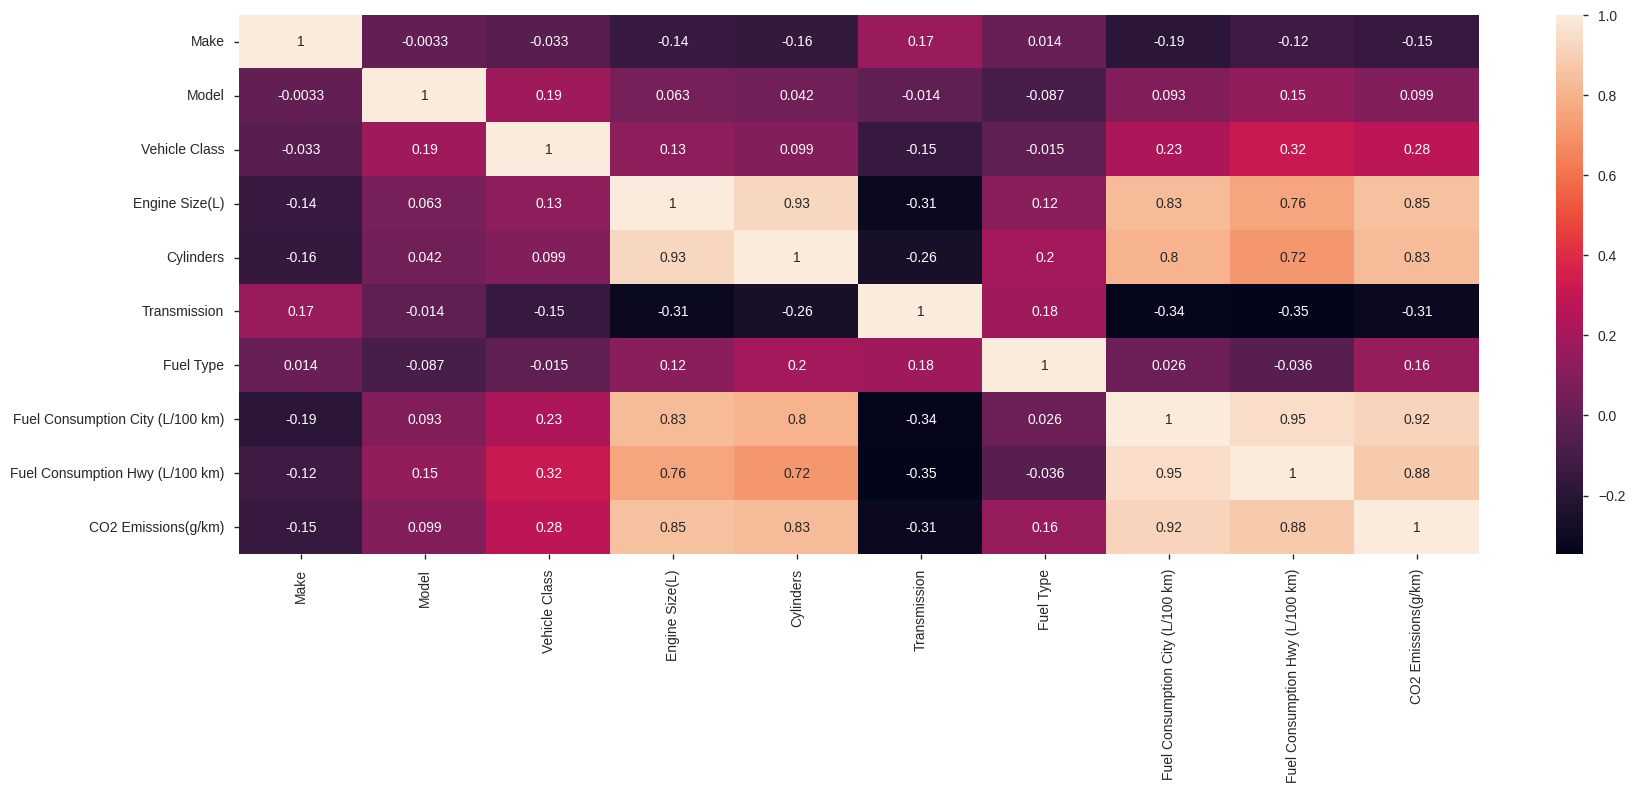

In [338]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [339]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [340]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 3)


In [341]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4608, 9)
(4608,)
(1152, 9)
(1152,)


In [342]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(max_depth = 7)

#param_grid = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
 #                'max_depth': list(range(2,500)),
  #              'max_features': ['auto', 'sqrt', 'log2'],
   #             'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




RandomForestRegressor(max_depth=7)

In [344]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [345]:
y_test_pred_op = lr.predict(x_test)


In [346]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

0
0 249.83198
1 339.60166

In [347]:

#op = pd.DataFrame(data_op_ori["id"])
op = pd.DataFrame()

#out = [op,y_test_pred_op]
out = [y_test_pred_op]

op = pd.concat(out, axis =1)

#op.set_index('id')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")

#op.columns =['id', 'OP']

op.head(2)


0
0 249.83198
1 339.60166

In [348]:
print(op.to_csv('/content/submission.csv', index=True, header=False))

None


In [349]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [350]:
x_test.shape

(1625, 9)

In [351]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

print((r2_train) - (r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))